# 1

In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv('Fish.csv')
print(fish.shape)
fish.head()

(159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
fish['Species'].unique().shape

(7,)

In [5]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
x = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [7]:
x, y

(     Weight  Length1  Length2  Length3   Height   Width
 0     242.0     23.2     25.4     30.0  11.5200  4.0200
 1     290.0     24.0     26.3     31.2  12.4800  4.3056
 2     340.0     23.9     26.5     31.1  12.3778  4.6961
 3     363.0     26.3     29.0     33.5  12.7300  4.4555
 4     430.0     26.5     29.0     34.0  12.4440  5.1340
 ..      ...      ...      ...      ...      ...     ...
 154    12.2     11.5     12.2     13.4   2.0904  1.3936
 155    13.4     11.7     12.4     13.5   2.4300  1.2690
 156    12.2     12.1     13.0     13.8   2.2770  1.2558
 157    19.7     13.2     14.3     15.2   2.8728  2.0672
 158    19.9     13.8     15.0     16.2   2.9322  1.8792
 
 [159 rows x 6 columns], 0      Bream
 1      Bream
 2      Bream
 3      Bream
 4      Bream
        ...  
 154    Smelt
 155    Smelt
 156    Smelt
 157    Smelt
 158    Smelt
 Name: Species, Length: 159, dtype: object)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# training the model
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = clf.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


In [14]:
print(f'result: {accuracy*100:.3f}')

result: 81.250


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

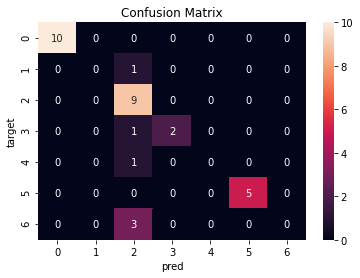

In [16]:
# cf, clf == classifier
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('pred')
plt.ylabel('target')
plt.title('Confusion Matrix')

# 2

In [17]:
import pandas as pd
lr = pd.read_csv('lr_test.csv')
print(lr.shape)
lr.head()

(569, 3)


,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34


In [18]:
lr.iloc[:,0].unique()

array(['M', 'B'], dtype=object)

In [19]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [20]:
x = lr.iloc[:, 1:]
y = lr.iloc[:, 0]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# training the model
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.60%


Text(0.5, 1.0, 'Confusion Matrix')

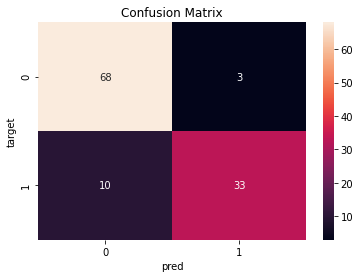

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('pred')
plt.ylabel('target')
plt.title('Confusion Matrix')